#  Projeto Telecom X - Análise de Evasão de Clientes


Este notebook tem como objetivo analisar os dados da Telecom X para entender os fatores que levam à evasão de clientes (churn).

# Extração

In [ ]:
# Importação de biblioteca
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

## Carregamento

In [ ]:
# Extraindo da API
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Requisição HTTP para obter o conteúdo
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    data_json = response.json()
    # Converte o JSON em um DataFrame do Pandas
    df_raw = pd.DataFrame(data_json)
    print(df_raw.head())
else:
    print(f"Erro ao acessar os dados: {response.status_code}")

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Normalizar o dados
df_raw = pd.json_normalize(data_json)
df_raw.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_raw.shape

(7267, 21)

In [ ]:
df_raw.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

# Análise preliminar do DF

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Valores nulos
df_raw.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
df_raw.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
df_raw.duplicated().sum()

np.int64(0)

In [ ]:
df_raw.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
# Dados categoricos
df_raw.describe(include='object')

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [ ]:
# Tipos das colunas categoricas
for col in df_raw.select_dtypes(include='object').columns:
    print(f'{col}: {df_raw[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

# Transformações

- `account.Charges.Total` - transformar para numérico
- `Churn` - preencher os espaços em branco por 'Unknown' e criar um dataset separado com essas informações
- Padronizar as colunas binárias - No = 0 / Yes = 1
- Criar nova variável `daily_charges`

In [ ]:
# Criando cópia
df_copy = df_raw.copy()

#### Conversão da coluna 'account.Charges.Total'

In [ ]:
# Conversão de dados
df_copy['account.Charges.Total'] = pd.to_numeric(df_copy['account.Charges.Total'], errors='coerce') #errors='coerce' para converter vazios em NaN (caso haja)

In [ ]:
print(df_copy['account.Charges.Total'].dtypes)

float64


In [ ]:
# Verificando se há valores nulos
df_copy[df_copy['account.Charges.Total'].isna()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN




A coluna `customer.tenure` representa os meses de contrato; a mesma está representada como Zero, indicando que o cliente é novo. Logo, na coluna `account.Charges.Total`, aqueles registros como NaN, podem indicar que ainda não foi gerado nenhuma cobrança.

In [ ]:
# Preencher 'account.Charges.Total' com zero.
df_copy.loc[df_copy['customer.tenure'] == 0, 'account.Charges.Total'] = 0.0

In [ ]:
df_copy['account.Charges.Total'].isna().sum()

np.int64(0)

#### Verificando a variável 'Churn'

In [ ]:
# Coluna 'churn' possui registros vazios
print((df_copy['Churn'] == '').sum())

224


In [ ]:
# Vendo só esses registros
df_copy[df_copy['Churn'] == '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [ ]:
df_copy[df_copy['Churn'] == ''].describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,224,224,224,224.000000,224,224,224.000000,224,224,224,...,224,224,224,224,224,224,224,224,224.000000,224.000000
unique,224,1,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,0047-ZHDTW,,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,224,120,NaN,116,153,NaN,199,105,102,...,94,100,109,86,85,130,140,80,NaN,NaN
mean,NaN,NaN,NaN,0.178571,NaN,NaN,31.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.412277,2196.933705
std,NaN,NaN,NaN,0.383851,NaN,NaN,24.998552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.388712,2329.961954
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,18.900000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.425000,351.037500
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.100000,1163.175000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.412500,3562.862500


In [ ]:
# Proporção dos valores vazios da coluna 'churn'
df_copy['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


A partir dessas informações, decidi criar dois dataframes:
1. Um dataset com os dados excluídos pois podem atrapalhar um possível modelo e será dataset que irei utilizar
2. Outor com o 'churn' preenchidos com 'Unknown' caso seja necessário utilizar posteriormente

In [ ]:
# 1. Dataset com registros de 'Churn' válidos apenas (para possível análise supervisionada)
df_churn_limpos = df_copy[df_copy['Churn'] != ''].copy()

# 2. Dataset com todos os registros, preenchendo vazios com 'Unknown'
df_churn_unknown = df_copy.copy()
df_churn_unknown['Churn'] = df_churn_unknown['Churn'].replace('', 'Unknown')

In [ ]:
df_churn_limpos.shape

(7043, 21)

In [ ]:
print(f"Dataset limpo: {df_churn_limpos.shape}")
print(df_churn_limpos['Churn'].value_counts())

print("\nDataset com 'Unknown':")
print(df_churn_unknown['Churn'].value_counts())

Dataset limpo: (7043, 21)
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Dataset com 'Unknown':
Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64


#### Padronização das variáveis binárias

In [ ]:
# Identificando as variáveis
binarias = [col for col in df_churn_limpos.columns
            if sorted(df_churn_limpos[col].unique()) == ['No', 'Yes']]
print(binarias)

['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']


In [ ]:
# Substituir 'Yes' = 1 e 'No' = 0
df_churn_limpos[binarias] = df_churn_limpos[binarias].replace({'Yes': 1, 'No': 0})

<ipython-input-62-2fb1389aa890>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn_limpos[binarias] = df_churn_limpos[binarias].replace({'Yes': 1, 'No': 0})


In [ ]:
df_churn_limpos[binarias].head()

,Churn,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1


#### Criar nova coluna 'daily_charges'

In [ ]:
# Criando a coluna contas diárias (Daily Charges)
# Como não temos colunas de datas, usei a média de dias num mês considerando meses com 30, 31 e 28/29 dias

df_churn_limpos['Daily_Charges'] = df_churn_limpos['account.Charges.Monthly'] / 30.42

In [ ]:
df_churn_limpos['Daily_Charges'].dtype

dtype('float64')

# Análise exploratória

In [ ]:
# Criando dataset limpo
df_silver = df_churn_limpos.copy()

In [ ]:
df_silver.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.128918
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.989153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.599934
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.166995
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.312623
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.953649
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.903682


# Visualizações

In [ ]:
# Estilo dos gráficos
sns.set(style='whitegrid')
custom_palette = 'BuGn'  # tons de azul-verde

# Exibir gráficos com tamanho padrão
plt.rcParams['figure.figsize'] = (8, 4)

## 1. Distribuição Geral de Churn

### Balanceamento da variável alvo 'Churn'

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


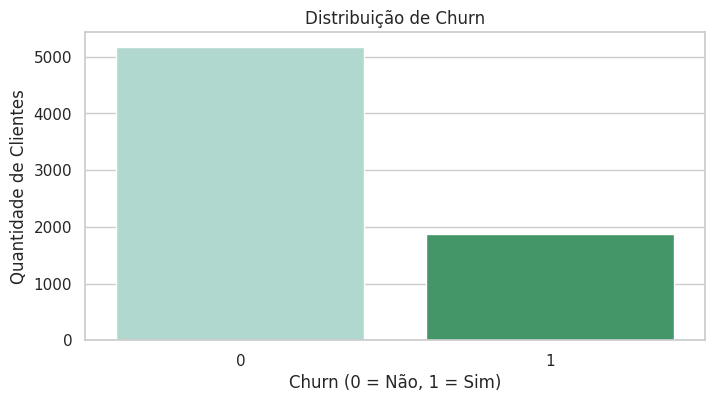

In [ ]:
# Contagem e proporção
print(df_silver['Churn'].value_counts(normalize=True))

# Gráfico
sns.countplot(data=df_silver, x='Churn', palette=custom_palette)
plt.title('Distribuição de Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()

Está muito desbalanceado, podendo interferir na criação de um modelo preditivo.

## 2. Perfil do Cliente

### Gênero

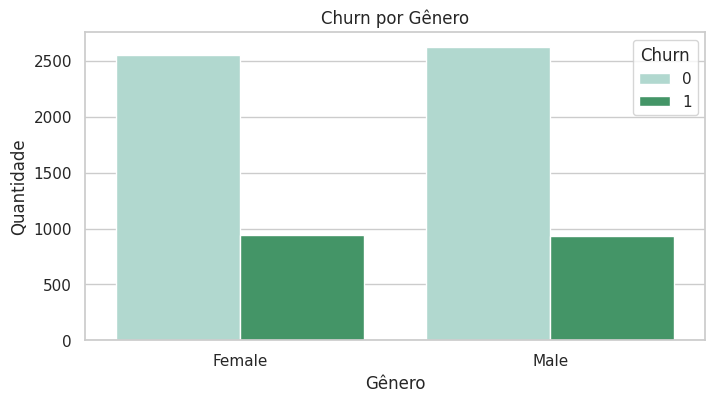

In [ ]:
sns.countplot(data=df_silver, x='customer.gender', hue='Churn', palette=custom_palette)
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

### Idoso

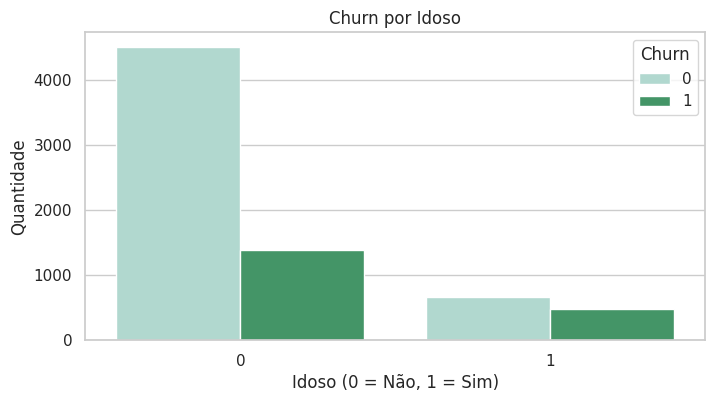

In [ ]:
sns.countplot(data=df_silver, x='customer.SeniorCitizen', hue='Churn', palette=custom_palette)
plt.title('Churn por Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

### Parceiros e Independentes

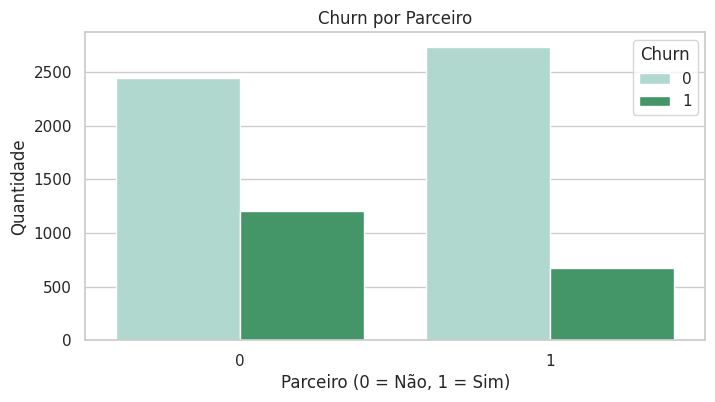

In [ ]:
# Partner (Parceiros)
sns.countplot(data=df_silver, x='customer.Partner', hue='Churn', palette=custom_palette)
plt.title('Churn por Parceiro')
plt.xlabel('Parceiro (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

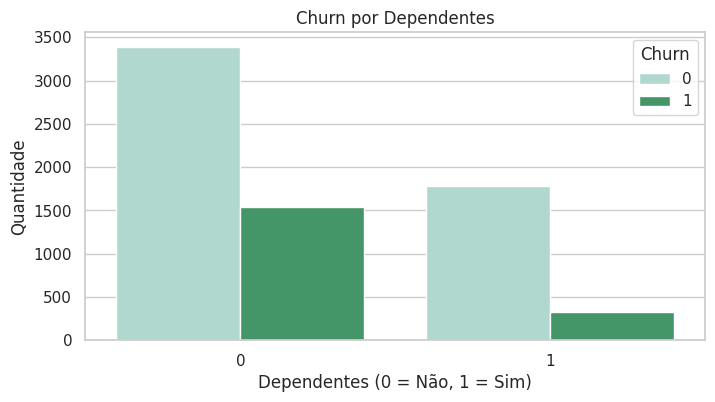

In [ ]:
# Dependentes
sns.countplot(data=df_silver, x='customer.Dependents', hue='Churn', palette=custom_palette)
plt.title('Churn por Dependentes')
plt.xlabel('Dependentes (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

## Tempo de Contrato (Tenue)

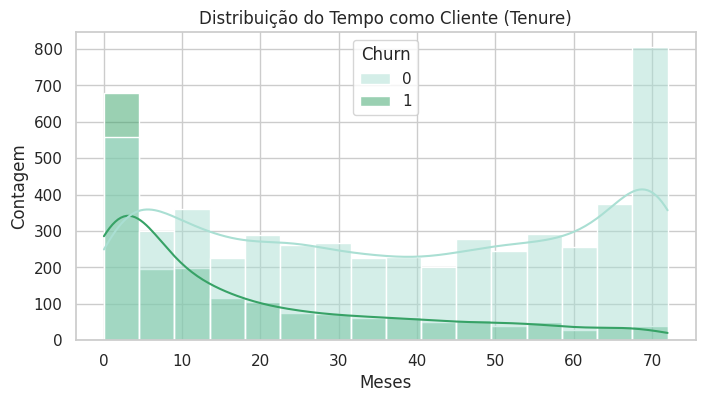

In [ ]:
sns.histplot(data=df_silver, x='customer.tenure', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição do Tempo como Cliente (Tenure)')
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.show()

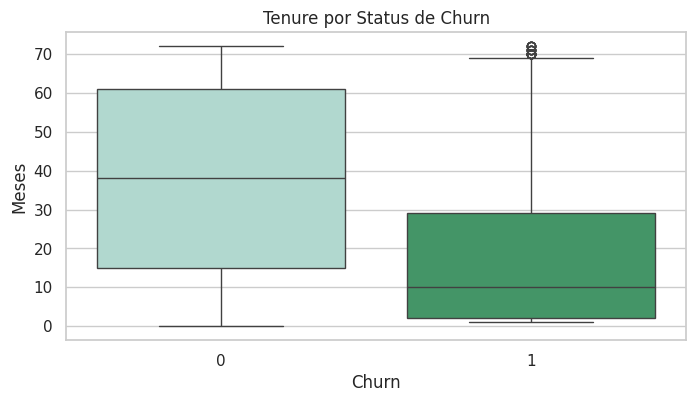

In [ ]:
sns.boxplot(data=df_silver, x='Churn', y='customer.tenure', palette=custom_palette)
plt.title('Tenure por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Meses')
plt.show()

## Serviços de Telefonia

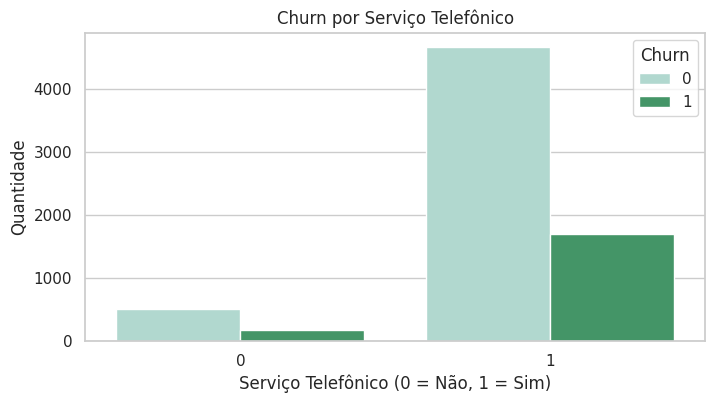

In [ ]:
sns.countplot(data=df_silver, x='phone.PhoneService', hue='Churn', palette=custom_palette)
plt.title('Churn por Serviço Telefônico')
plt.xlabel('Serviço Telefônico (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

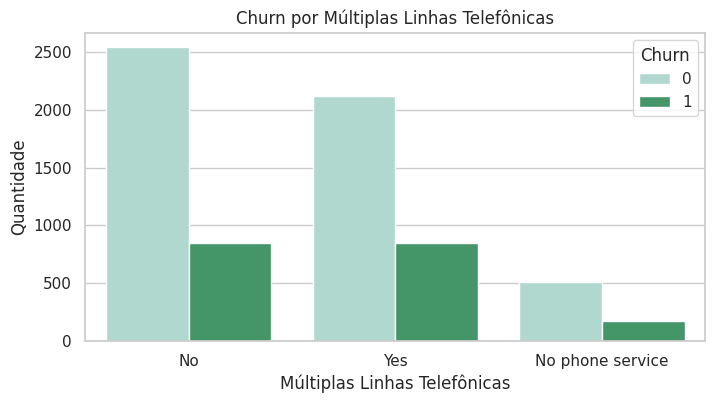

In [ ]:
sns.countplot(data=df_silver, x='phone.MultipleLines', hue='Churn', palette=custom_palette)
plt.title('Churn por Múltiplas Linhas Telefônicas')
plt.xlabel('Múltiplas Linhas Telefônicas')
plt.ylabel('Quantidade')
plt.show()

## Serviços de Internet

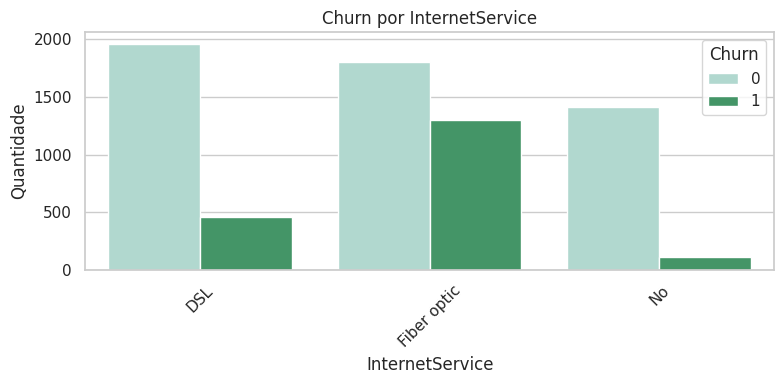

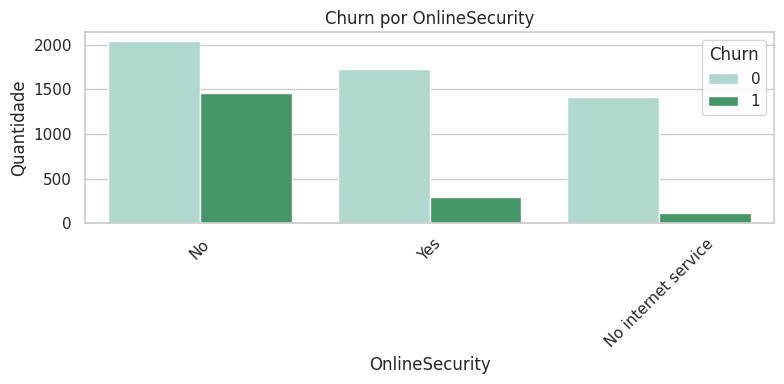

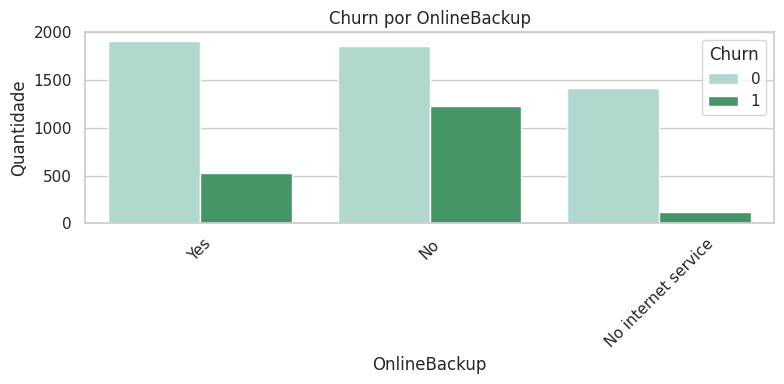

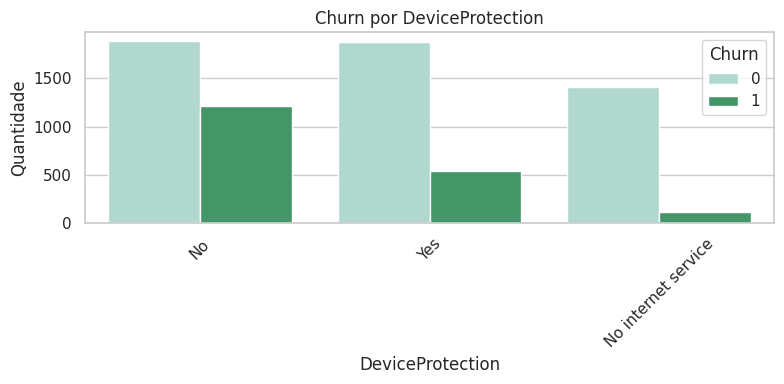

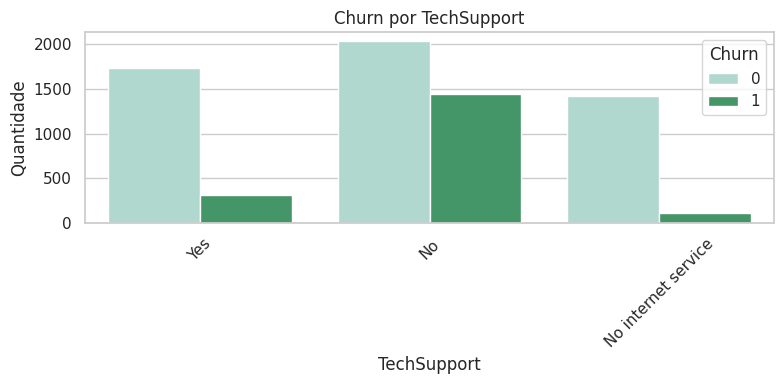

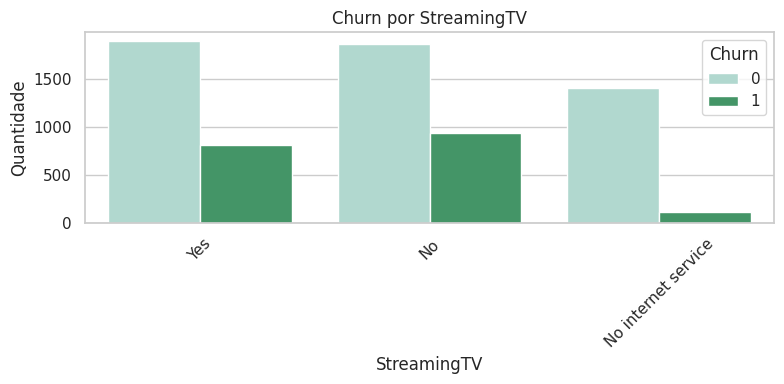

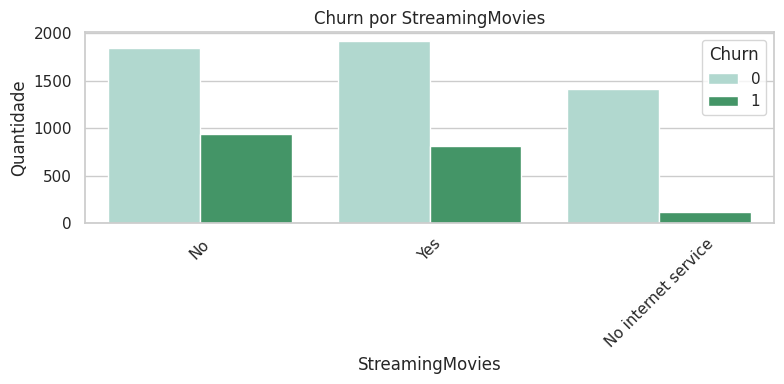

In [ ]:
features = [
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies'
]

for feature in features:
    sns.countplot(data=df_silver, x=feature, hue='Churn', palette=custom_palette)
    plt.title(f'Churn por {feature.split(".")[1]}')
    plt.xlabel(feature.split(".")[1])
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Contrato e Pagamento

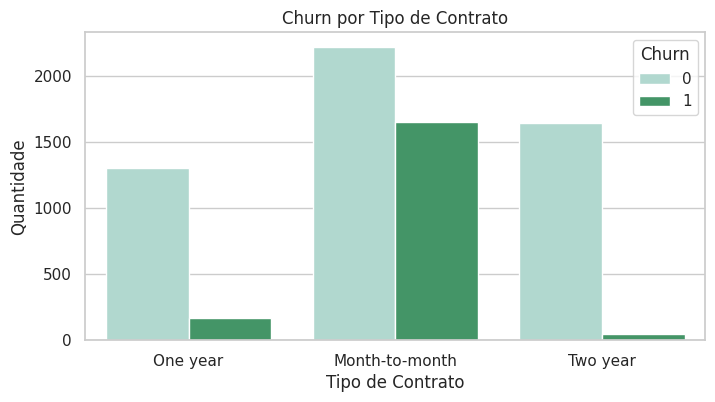

In [ ]:
sns.countplot(data=df_silver, x='account.Contract', hue='Churn', palette=custom_palette)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.show()

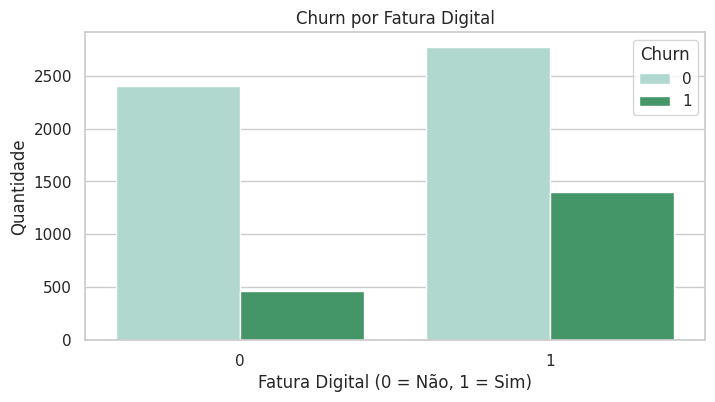

In [ ]:
sns.countplot(data=df_silver, x='account.PaperlessBilling', hue='Churn', palette=custom_palette)
plt.title('Churn por Fatura Digital')
plt.xlabel('Fatura Digital (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()

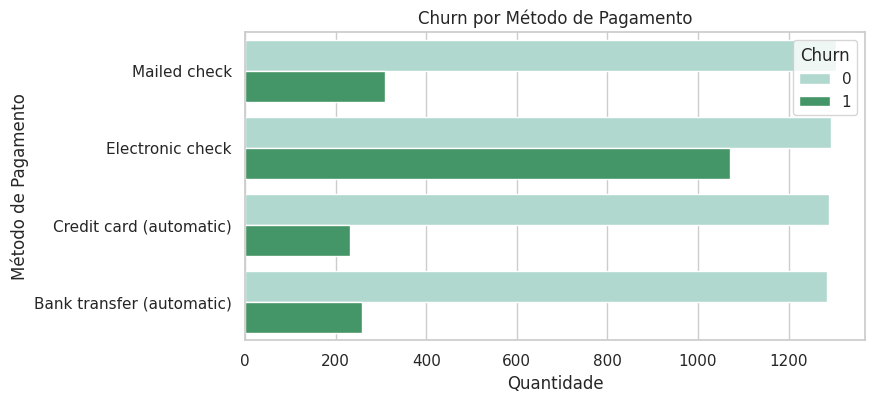

In [ ]:
sns.countplot(data=df_silver, y='account.PaymentMethod', hue='Churn', palette=custom_palette)
plt.title('Churn por Método de Pagamento')
plt.xlabel('Quantidade')
plt.ylabel('Método de Pagamento')
plt.show()


## Análise de Cobrança

In [ ]:
df_silver.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

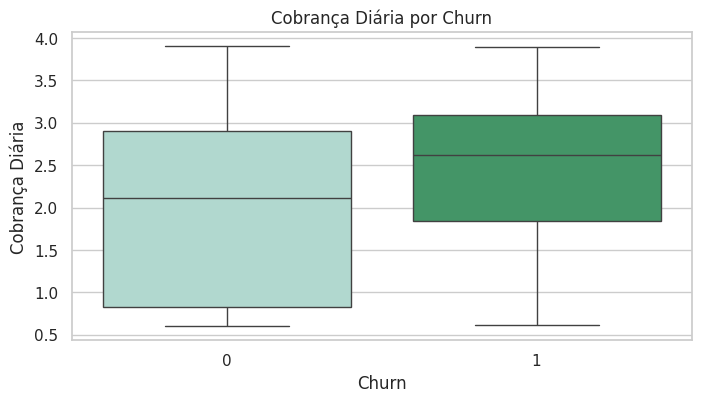

In [ ]:
sns.boxplot(data=df_silver, x='Churn', y='Daily_Charges', palette=custom_palette)
plt.title('Cobrança Diária por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Diária')
plt.show()

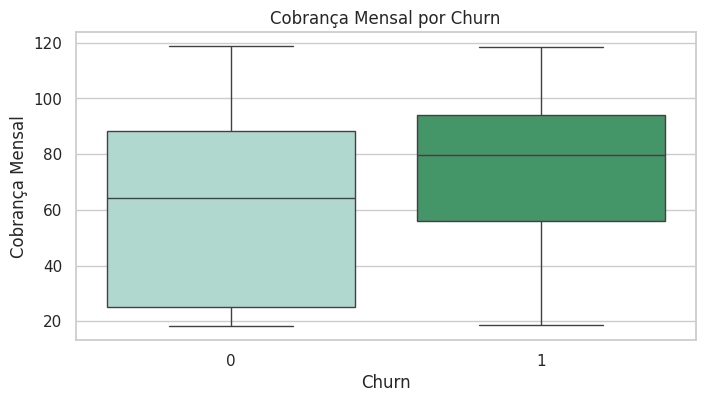

In [ ]:
sns.boxplot(data=df_silver, x='Churn', y='account.Charges.Monthly', palette=custom_palette)
plt.title('Cobrança Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal')
plt.show()

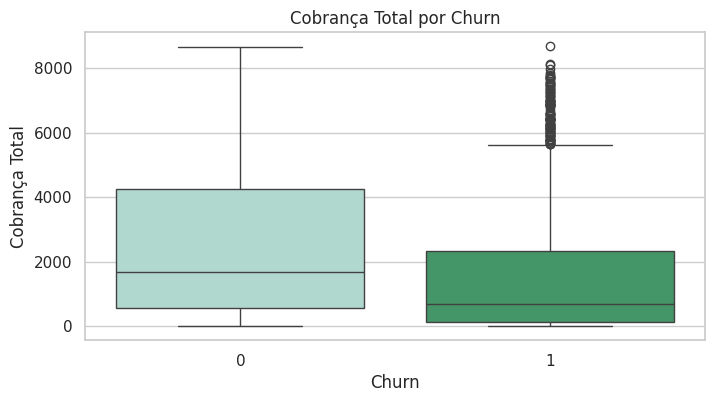

In [ ]:
sns.boxplot(data=df_silver, x='Churn', y='account.Charges.Total', palette=custom_palette)
plt.title('Cobrança Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Total')
plt.show()

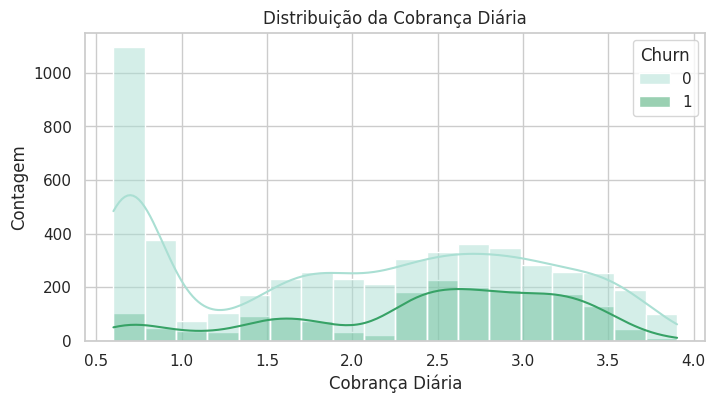

In [ ]:
sns.histplot(data=df_silver, x='Daily_Charges', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Diária')
plt.xlabel('Cobrança Diária')
plt.ylabel('Contagem')
plt.show()

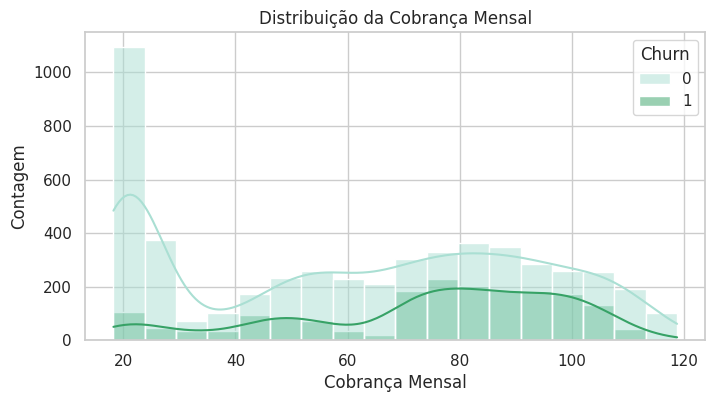

In [ ]:
sns.histplot(data=df_silver, x='account.Charges.Monthly', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Mensal')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Contagem')
plt.show()

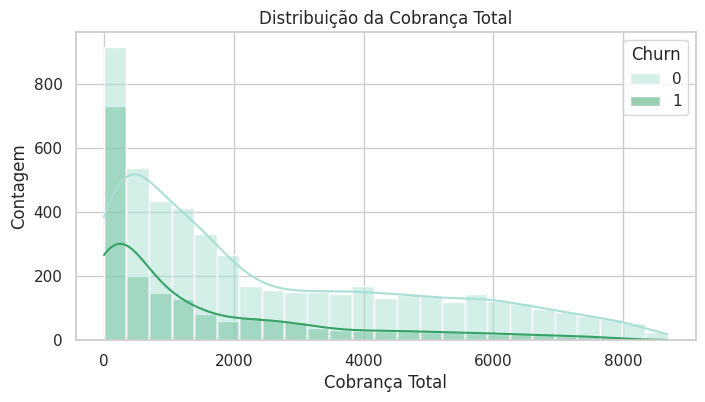

In [ ]:
sns.histplot(data=df_silver, x='account.Charges.Total', hue='Churn', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Total')
plt.xlabel('Cobrança Total')
plt.ylabel('Contagem')
plt.show()

## Correlações

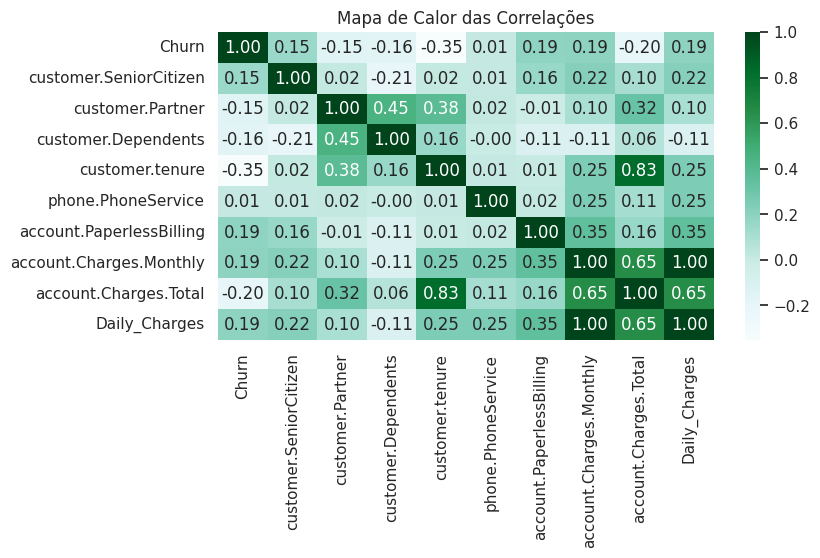

In [ ]:
corr = df_silver.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

## Gráficos de Dispersão

### Cobrança Mensal x Total

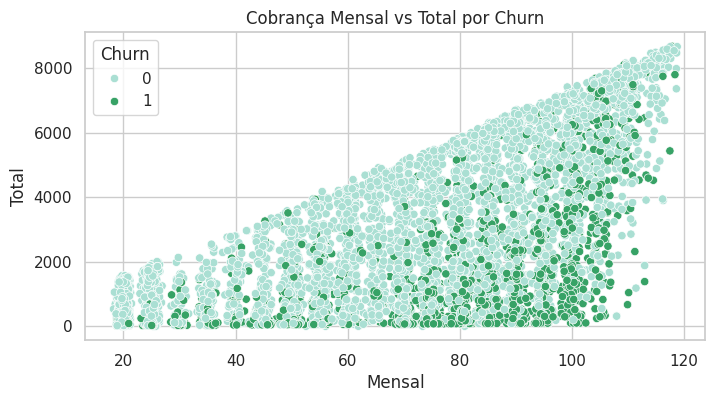

In [ ]:
sns.scatterplot(data=df_silver,
                x='account.Charges.Monthly',
                y='account.Charges.Total',
                hue='Churn',
                palette=custom_palette)
plt.title('Cobrança Mensal vs Total por Churn')
plt.xlabel('Mensal')
plt.ylabel('Total')
plt.show()

# 📝 Relatório Final – Projeto Churn de Clientes da Telecom X

## 📌 1. Introdução

A Telecom X enfrenta um alto índice de evasão de clientes (churn), impactando diretamente sua receita e previsibilidade de negócios. Este projeto tem como objetivo realizar uma análise exploratória dos dados (EDA) fornecidos pela empresa a fim de identificar padrões, tendências e fatores que influenciam a decisão dos clientes em cancelar seus serviços. A partir dessa investigação, espera-se gerar insights acionáveis para orientar estratégias de retenção.


___

## 🧹 2. Limpeza e Tratamento de Dados
Os dados foram importados a partir de uma API fornecida no formato JSON. As principais etapas de preparação incluíram:

* Normalização da estrutura JSON em um DataFrame tabular.

* Conversão de colunas numéricas mal interpretadas como texto (ex: account.Charges.Total).

* Preenchimento de valores ausentes:

    * Valores nulos em account.Charges.Total substituídos por 0 para clientes com tenure = 0.

* Remoção de registros sem valor válido na variável alvo Churn.

* Categorização adequada das colunas.

* Criação de novas variáveis para apoiar análises, como Daily_Charges.

___

## 📊 3. Análise Exploratória de Dados (EDA)

A análise exploratória foi conduzida com apoio de visualizações (gráficos de barras, dispersão, histogramas e mapas de calor) e foco na variável Churn.


### 📌 3.1. Perfil dos Clientes que Evadem
* Clientes com tenure curto (< 12 meses) demonstram maior propensão ao churn.

* Há forte evasão entre usuários com contratos mensais, sem serviços adicionais e com faturas diárias elevadas.

* A ausência de serviços como internet.OnlineSecurity, internet.TechSupport e internet.OnlineBackup está associada a taxas mais altas de evasão.

* Clientes com cobrança digital (Paperless Billing) também apresentaram maior churn.

### 📌 3.2. Correlações com Churn
* A variável Churn apresentou maior correlação positiva com:

    * Contract: Month-to-month
    * PaperlessBilling: Yes
    * Daily_Charges elevado

* E correlação negativa com:

    * Tenure

    * OnlineSecurity, TechSupport, Backup: "Yes"

*🔍 Gráficos relevantes foram incluídos ao longo da análise para sustentar as conclusões acima.*


___

## 📈 4. Conclusões e Insights

* A evasão está altamente concentrada em clientes com menor fidelização, serviços básicos e faturas elevadas.

* Pacotes com múltiplos serviços demonstram retenção mais eficaz.

* Clientes mais antigos tendem a ser mais fiéis, apontando para a importância do onboarding e fidelização inicial.

* Contratos mensais são um ponto crítico — estratégias para estimular a migração para contratos de longo prazo podem ser eficazes.


___

## ✅ 5. Recomendações

* Oferecer pacotes com múltiplos serviços essenciais com desconto (ex: suporte técnico + backup).

* Incentivar contratos de longo prazo com benefícios claros para reduzir evasão mensal.

* Monitorar novos clientes nos primeiros meses com campanhas de retenção e atendimento proativo.

* Avaliar reajustes em planos com fatura muito elevada, pois estão associados a maiores taxas de churn.

* Estudar os perfis com churn elevado para campanhas personalizadas de reengajamento.



### 🎯 Próximos Passos

* Preparar os dados para uma modelagem preditiva.

* Aplicar técnicas de balanceamento de classe (SMOTE, undersampling) para corrigir o desbalanceamento da variável Churn.

* Treinar e avaliar modelos preditivos com foco em interpretabilidade e ações práticas.

# Salvando Dataset

In [110]:
# Renomear o dataframe
df_gold = df_silver.copy()

# Salvar o dataframe limpo em um arquivo CSV
df_gold.to_csv('telecomx_data_gold.csv', index=False)